<AxesSubplot:>

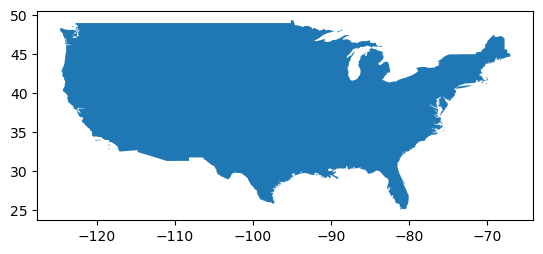

In [3]:
import geopandas as gpd
from shapely.geometry import Polygon

# Load the shapefile of the USA
shapefile_path = "/n/holyscratch01/jacob_lab/lestrada/IMI/CONUS_example_application/integrated_methane_inversion/resources/shapefiles/States_shapefile/States_shapefile.shp"
usa_gdf = gpd.read_file(shapefile_path)

# Define the bounding box coordinates for the contiguous United States (CONUS)
min_lon, min_lat = -125, 24.396308
max_lon, max_lat = -66.934570, 49.384358

# Create a Polygon representing the CONUS bounding box
conus_polygon = Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])

# Filter the USA shapefile to only include polygons within the CONUS bounding box
conus_gdf = usa_gdf[usa_gdf.geometry.intersects(conus_polygon)]

# dissolve into a single polygon
aggregated_conus_gdf = conus_gdf.unary_union

# Create a new GeoDataFrame with the aggregated geometry
aggregated_conus_gdf = gpd.GeoDataFrame(geometry=[aggregated_conus_gdf])
aggregated_conus_gdf.plot()


In [4]:
# save out new shapefile
aggregated_shapefile_path = '/n/holyscratch01/jacob_lab/lestrada/IMI/CONUS_example_application/integrated_methane_inversion/resources/shapefiles/conus.shp'
aggregated_conus_gdf.to_file(aggregated_shapefile_path)